<a href="https://colab.research.google.com/github/LuongHaoWen2/HW-SIT-BLOG/blob/main/preproc_p_prototype2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Operation cancelled by user


In [ ]:
!pip list

Package                       Version
----------------------------- ----------------------
absl-py                       1.3.0
aeppl                         0.0.33
aesara                        2.7.9
aiohttp                       3.8.3
aiosignal                     1.3.1
alabaster                     0.7.12
albumentations                1.2.1
altair                        4.2.0
appdirs                       1.4.4
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
async-timeout                 4.0.2
asynctest                     0.13.0
atari-py                      0.2.9
atomicwrites                  1.4.1
attrs                         22.1.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.11.0
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.1
blis                          0.7.9
bokeh

In [ ]:
import warnings
warnings.simplefilter(action='ignore' , category=FutureWarning)

In [ ]:
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib import cm
import glob
import pandas as pd
import cv2

from numpy import expand_dims

import torchvision.transforms.functional as TRF
from torchvision import transforms
import torch

from skimage.io import imread
from google.colab import files
from keras.preprocessing import image
from torchvision.utils import save_image


In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


198


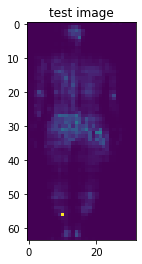

In [ ]:
#test if the data is able to succesfully be loaded


size = (64,32)

#the filepath for train images
data_dir = pathlib.Path("drive/MyDrive/MP_dataset/bed_photo/training")

#find the number of images
image_count = len(list(data_dir.glob('*/*.txt')))
print(image_count)

#test one file to see if can open
test_read = np.loadtxt("drive/MyDrive/MP_dataset/bed_photo/training/supine/S1_1.txt")
test_read.shape
plt.title("test image")
fig = plt.imshow(test_read[6,:].reshape(64,32))

In [ ]:
#read txt file from directory and convert to jpg for training


exp_path = 'drive/MyDrive/MP_dataset/bed_photo/training'
position_i = [file for file in os.listdir(exp_path) if os.path.isdir(os.path.join(exp_path, file))]
print(f"The subjects on the Experiment I are: {position_i}")
final_data={}


for _,dirs,_ in os.walk(exp_path):
  print(dirs)
  for directory in dirs:
    #each directory is a position
    subject = directory
    data=None
    labels=None

    for _,_,files1 in os.walk(os.path.join(exp_path,directory)):
      print(files1)
      file_name_name = np.array([files1] , dtype=str)
      for file in files1 :
        if file.endswith(".txt"):
           file_path = os.path.join(exp_path ,directory,file)
           print(file)
           print(file_path)



        with open(file_path , 'r' ) as f:

          for line in f.read().splitlines():

            raw_data = np.fromstring(line,dtype=float , sep='\t')
            file_data=np.round(raw_data*255/1000).astype(np.uint8)
            Normalize = transforms.Compose([transforms.ToPILImage(),
                                  transforms.ToTensor()])

            file_data = Normalize(file_data.reshape(64,32))
            #uncomnment save_image line when first running code
            save_image(file_data , (f'drive/MyDrive/MP_dataset/bed_photo/training/{directory}/{file}.jpg'))

            #file_data = file_data.save('test.png')
            file_data = file_data.view(1,64,32,1)
            if data is None:
               data=file_data
            else:
               data=np.concatenate((data,file_data),axis=0)

        final_data[subject] = (torch.from_numpy(data), file_data)
        final_data.keys()







The subjects on the Experiment I are: ['supine', 'right', 'left']
['supine', 'right', 'left']
['S11_15.txt', 'S10_7.txt', 'S1_11.txt', 'S10_4.txt', 'S1_9.txt', 'S10_15.txt', 'S10_1.txt', 'S10_6.txt', 'S1_4.txt', 'S1_5.txt', 'S10_12.txt', 'S10_17.txt', 'S1_6.txt', 'S1_12.txt', 'S1_16.txt', 'S1_10.txt', 'S10_8.txt', 'S1_7.txt', 'S10_5.txt', 'S1_17.txt', 'S10_11.txt', 'S10_10.txt', 'S1_15.txt', 'S11_11.txt', 'S11_10.txt', 'S11_12.txt', 'S1_8.txt', 'S10_9.txt', 'S10_16.txt', 'S11_1.txt', 'S1_1.txt', 'S12_5.txt', 'S13_8.txt', 'S12_8.txt', 'S2_5.txt', 'S13_12.txt', 'S12_10.txt', 'S13_15.txt', 'S12_1.txt', 'S2_11.txt', 'S13_1.txt', 'S12_7.txt', 'S2_15.txt', 'S12_12.txt', 'S11_16.txt', 'S13_9.txt', 'S13_10.txt', 'S13_11.txt', 'S13_5.txt', 'S12_6.txt', 'S12_17.txt', 'S12_16.txt', 'S2_12.txt', 'S2_10.txt', 'S13_6.txt', 'S11_5.txt', 'S11_4.txt', 'S11_8.txt', 'S12_9.txt', 'S13_16.txt', 'S11_6.txt', 'S13_17.txt', 'S13_4.txt', 'S12_15.txt', 'S11_7.txt', 'S12_4.txt', 'S2_6.txt', 'S11_17.txt', 'S2_16.

In [ ]:
#read txt file from directory and convert to jpg for validation


exp_path = 'drive/MyDrive/MP_dataset/bed_photo/validation'
position_i = [file for file in os.listdir(exp_path) if os.path.isdir(os.path.join(exp_path, file))]
print(f"The subjects on the Experiment I are: {position_i}")


for _,dirs,_ in os.walk(exp_path):
  print(dirs)
  for directory in dirs:
    #each directory is a position
    subject = directory
    data=None
    labels=None

    for _,_,files1 in os.walk(os.path.join(exp_path,directory)):
      print(files1)
      file_name_name = np.array([files1] , dtype=str)
      for file in files1 :
        if file.endswith(".txt"):
           file_path = os.path.join(exp_path ,directory,file)
           print(file)
           print(file_path)



        with open(file_path , 'r' ) as f:

          for line in f.read().splitlines()[2:]:

            raw_data = np.fromstring(line,dtype=float , sep='\t')
            file_data=np.round(raw_data*255/1000).astype(np.uint8)
            Normalize = transforms.Compose([transforms.ToPILImage(),
                                  transforms.ToTensor()])

            file_data = Normalize(file_data.reshape(64,32))
            #uncomnment save_image line when first running code
            #save_image(file_data , (f'drive/MyDrive/MP_dataset/bed_photo/validation/{directory}/{file}.jpg'))


            file_data = file_data.view(1,64,32,1)











The subjects on the Experiment I are: ['right', 'left', 'supine']
['right', 'left', 'supine']
['S7_3.txt.jpg', 'S5_3.txt.jpg', 'S5_14.txt.jpg', 'S6_3.txt.jpg', 'S6_14.txt.jpg']
['S7_13.txt.jpg', 'S2_2.txt.jpg', 'S3_13.txt.jpg', 'S7_2.txt.jpg', 'S12_13.txt.jpg', 'S8_13.txt.jpg']
['S9_9.txt.jpg', 'S9_8.txt.jpg', 'S9_5.txt.jpg', 'S6_17.txt.jpg', 'S6_16.txt.jpg', 'S7_5.txt.jpg', 'S9_4.txt.jpg', 'S8_6.txt.jpg', 'S9_6.txt.jpg', 'S9_7.txt.jpg', 'S9_17.txt.jpg']
[]
[]
[]


In [ ]:
import shutil
from filecmp import cmp
from pathlib import Path
source = "drive/MyDrive/MP_dataset/bed_photo/training/right"
dest = "drive/MyDrive/MP_dataset/bed_photo/training_images/right"



duplicateFiles=[]
# gather all files
allfiles = os.listdir(source)
#print(allfiles)

# iterate on all files to move them to destination folder
for f in allfiles:
  if f.endswith(".jpg"):
    #print(f)

    src_path = os.path.join(source, f)
    dst_path = os.path.join(dest, f)
    shutil.move(src_path, dst_path)

DATA_DIR = Path(source)
files = sorted(os.listdir(DATA_DIR))
for file_x in files:
  if f.endswith('.jpg'):
    print(file_x)

    if_dupl = False

    for class_ in duplicateFiles:
        # Comparing files having same content using cmp()
        # class_[0] represents a class having same content
        if_dupl = cmp(
            DATA_DIR / file_x,
            DATA_DIR/ class_[0],
            shallow=False
        )
        if if_dupl:
            class_.append(file_x)
            break

    if not if_dupl:
        duplicateFiles.append([file_x])

# Print results
print(duplicateFiles)


S10_14.txt
S10_3.txt
S11_14.txt
S11_3.txt
S12_14.txt
S12_3.txt
S13_14.txt
S13_3.txt
S1_14.txt
S1_3.txt
S2_14.txt
S2_3.txt
S3_14.txt
S3_3.txt
S4_14.txt
S4_3.txt
S7_14.txt
S8_14.txt
S8_3.txt
S9_14.txt
S9_3.txt
[['S10_14.txt'], ['S10_3.txt'], ['S11_14.txt'], ['S11_3.txt'], ['S12_14.txt'], ['S12_3.txt'], ['S13_14.txt'], ['S13_3.txt'], ['S1_14.txt'], ['S1_3.txt'], ['S2_14.txt'], ['S2_3.txt'], ['S3_14.txt'], ['S3_3.txt'], ['S4_14.txt'], ['S4_3.txt'], ['S7_14.txt'], ['S8_14.txt'], ['S8_3.txt'], ['S9_14.txt'], ['S9_3.txt']]


In [ ]:

import shutil
from filecmp import cmp
from pathlib import Path
source = "drive/MyDrive/MP_dataset/bed_photo/training/supine"
dest = "drive/MyDrive/MP_dataset/bed_photo/training_images/supine"



duplicateFiles=[]
# gather all files
allfiles = os.listdir(source)
#print(allfiles)

# iterate on all files to move them to destination folder
for f in allfiles:
  if f.endswith(".jpg"):
    #print(f)

    src_path = os.path.join(source, f)
    dst_path = os.path.join(dest, f)
    shutil.move(src_path, dst_path)

DATA_DIR = Path(source)
files = sorted(os.listdir(DATA_DIR))
for file_x in files:
  if f.endswith('.jpg'):
    print(file_x)

    if_dupl = False

    for class_ in duplicateFiles:
        # Comparing files having same content using cmp()
        # class_[0] represents a class having same content
        if_dupl = cmp(
            DATA_DIR / file_x,
            DATA_DIR/ class_[0],
            shallow=False
        )
        if if_dupl:
            class_.append(file_x)
            break

    if not if_dupl:
        duplicateFiles.append([file_x])

# Print results
print(duplicateFiles)


S10_1.txt
S10_10.txt
S10_11.txt
S10_12.txt
S10_15.txt
S10_16.txt
S10_17.txt
S10_4.txt
S10_5.txt
S10_6.txt
S10_7.txt
S10_8.txt
S10_9.txt
S11_1.txt
S11_10.txt
S11_11.txt
S11_12.txt
S11_15.txt
S11_16.txt
S11_17.txt
S11_4.txt
S11_5.txt
S11_6.txt
S11_7.txt
S11_8.txt
S11_9.txt
S12_1.txt
S12_10.txt
S12_11.txt
S12_12.txt
S12_15.txt
S12_16.txt
S12_17.txt
S12_4.txt
S12_5.txt
S12_6.txt
S12_7.txt
S12_8.txt
S12_9.txt
S13_1.txt
S13_10.txt
S13_11.txt
S13_12.txt
S13_15.txt
S13_16.txt
S13_17.txt
S13_4.txt
S13_5.txt
S13_6.txt
S13_7.txt
S13_8.txt
S13_9.txt
S1_1.txt
S1_10.txt
S1_11.txt
S1_12.txt
S1_15.txt
S1_16.txt
S1_17.txt
S1_4.txt
S1_5.txt
S1_6.txt
S1_7.txt
S1_8.txt
S1_9.txt
S2_1.txt
S2_10.txt
S2_11.txt
S2_12.txt
S2_15.txt
S2_16.txt
S2_17.txt
S2_4.txt
S2_5.txt
S2_6.txt
S2_7.txt
S2_8.txt
S2_9.txt
S3_1.txt
S3_10.txt
S3_11.txt
S3_12.txt
S3_15.txt
S3_16.txt
S3_17.txt
S3_4.txt
S3_5.txt
S3_6.txt
S3_7.txt
S3_8.txt
S3_9.txt
S4_1.txt
S4_10.txt
S4_11.txt
S4_12.txt
S4_15.txt
S4_16.txt
S4_17.txt
S4_4.txt
S4_5.txt


In [ ]:
import shutil
from filecmp import cmp
from pathlib import Path
source = "drive/MyDrive/MP_dataset/bed_photo/training/left"
dest = "drive/MyDrive/MP_dataset/bed_photo/training_images/left"



duplicateFiles=[]
# gather all files
allfiles = os.listdir(source)
#print(allfiles)

# iterate on all files to move them to destination folder
for f in allfiles:
  if f.endswith(".jpg"):
    #print(f)

    src_path = os.path.join(source, f)
    dst_path = os.path.join(dest, f)
    shutil.move(src_path, dst_path)

DATA_DIR = Path(source)
files = sorted(os.listdir(DATA_DIR))
for file_x in files:
  if f.endswith('.jpg'):
    print(file_x)

    if_dupl = False

    for class_ in duplicateFiles:
        # Comparing files having same content using cmp()
        # class_[0] represents a class having same content
        if_dupl = cmp(
            DATA_DIR / file_x,
            DATA_DIR/ class_[0],
            shallow=False
        )
        if if_dupl:
            class_.append(file_x)
            break

    if not if_dupl:
        duplicateFiles.append([file_x])

# Print results
print(duplicateFiles)

S10_13.txt
S10_2.txt
S11_13.txt
S11_2.txt
S12_2.txt
S13_13.txt
S13_2.txt
S1_13.txt
S1_2.txt
S2_13.txt
S3_2.txt
S4_13.txt
S5_13.txt
S5_2.txt
S6_13.txt
S6_2.txt
S8_2.txt
S9_13.txt
S9_2.txt
[['S10_13.txt'], ['S10_2.txt'], ['S11_13.txt'], ['S11_2.txt'], ['S12_2.txt'], ['S13_13.txt'], ['S13_2.txt'], ['S1_13.txt'], ['S1_2.txt'], ['S2_13.txt'], ['S3_2.txt'], ['S4_13.txt'], ['S5_13.txt'], ['S5_2.txt'], ['S6_13.txt'], ['S6_2.txt'], ['S8_2.txt'], ['S9_13.txt'], ['S9_2.txt']]


In [ ]:
print(final_data)

{'supine': (tensor([[[[0.0000],
          [0.0000],
          [0.0000],
          ...,
          [0.0000],
          [0.0000],
          [0.0000]],

         [[0.0000],
          [0.0000],
          [0.0000],
          ...,
          [0.0000],
          [0.0000],
          [0.0000]],

         [[0.0000],
          [0.0000],
          [0.0000],
          ...,
          [0.0000],
          [0.0000],
          [0.0000]],

         ...,

         [[0.0000],
          [0.0000],
          [0.0000],
          ...,
          [0.0000],
          [0.0000],
          [0.0000]],

         [[0.0000],
          [0.0000],
          [0.0000],
          ...,
          [0.0000],
          [0.0000],
          [0.0000]],

         [[0.0000],
          [0.0000],
          [0.0000],
          ...,
          [0.0000],
          [0.0000],
          [0.0000]]],


        [[[0.0000],
          [0.0000],
          [0.0000],
          ...,
          [0.0000],
          [0.0000],
          [0.8078]],

         [[0

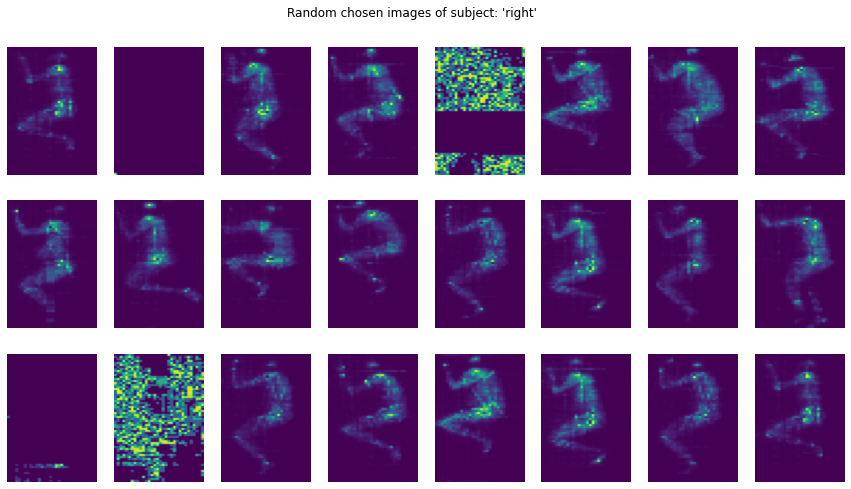

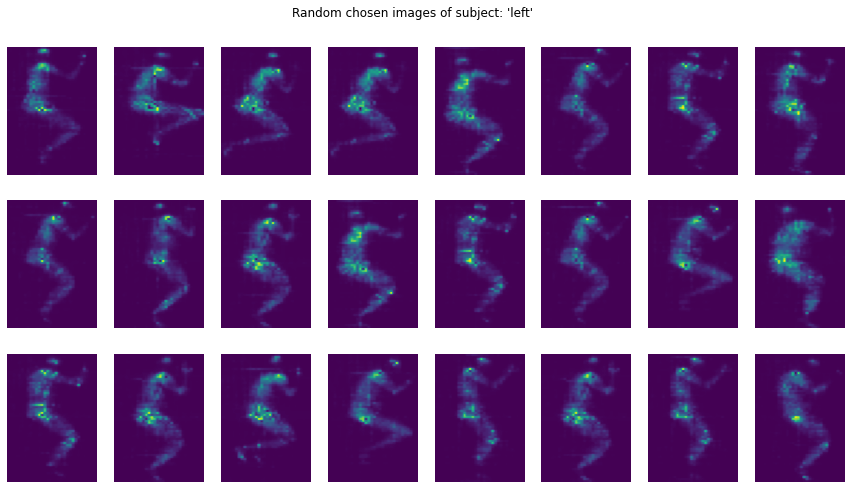

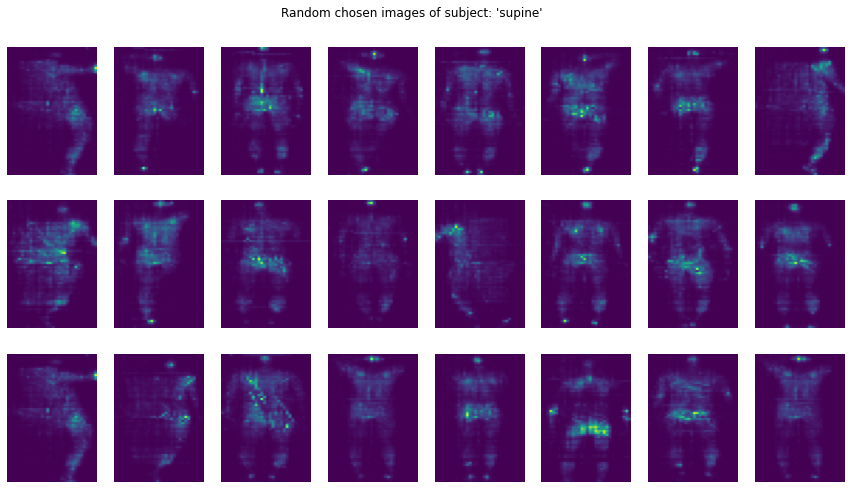

In [ ]:
for subject in position_i:

  # read the subject
  size = final_data[subject][0].shape[0]

  # sample
  sample = np.random.choice(range(0, size), 24, replace = False)
  # data
  data = final_data[subject][0].numpy()
  # plots
  f, arr = plt.subplots(3, 8, figsize = (15, 8))
  f.suptitle(f'Random chosen images of subject: \'{subject}\'', y = 0.95)
  fig = 0


  for r in range(3):
      for c in range(8):
          arr[r, c].imshow(data[sample[fig]].reshape(64, 32), aspect = 'auto')
          arr[r, c].axis('off')
          fig+=1


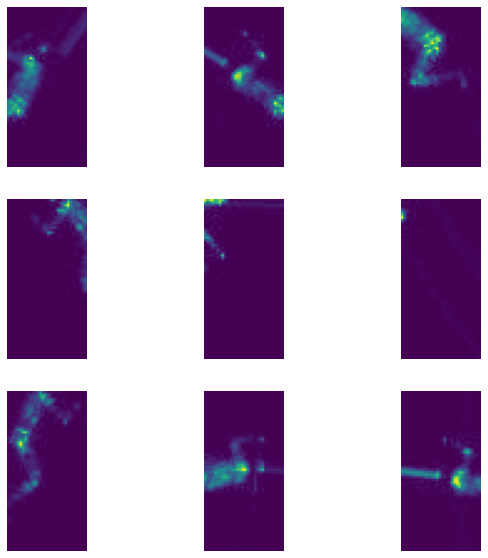

In [ ]:
imgs = os.listdir('drive/MyDrive/MP_dataset/bed_photo/testimages')

plt.figure(figsize=(10,10))
for img in imgs:
  for i in range(9):
    img = plt.imread('drive/MyDrive/MP_dataset/bed_photo/testimages/' + imgs[i])
    ax = plt.subplot(3,3,i + 1 )
    plt.imshow(img)
    plt.axis("off")
  break


In [ ]:
position_i = [file for file in os.listdir(exp_path) if os.path.isdir(os.path.join(exp_path, file))]
print(f"The positon on the Experiment I are: {position_i}")


The positon on the Experiment I are: ['right', 'left', 'supine']


In [ ]:
batch_size = 50
img_height = 64
img_width = 32


#augmentation configuration
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(


    shear_range=0.2,
    width_shift_range=0.15,
    height_shift_range=0.15,

    rotation_range = 15,

)


train_generator = train_datagen.flow_from_directory(
    'drive/MyDrive/MP_dataset/bed_photo/training_images',

    target_size=(64,32),
    batch_size = batch_size,
    class_mode = 'categorical'



)





validation_generator = train_datagen.flow_from_directory(
    'drive/MyDrive/MP_dataset/bed_photo/validation',
    target_size=(64,32),
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle=False

)





FileNotFoundError: ignored

In [ ]:
# imagee = train_generator
# imagee = np.array(imagee)

KeyboardInterrupt: ignored

tensor shape with batch 32  (50, 64, 32, 3)


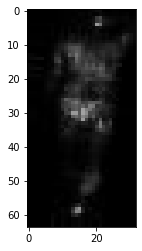

In [ ]:
print("tensor shape with batch 32 " , train_generator[0][0].shape)
imagee = train_generator[0][0][2]
plt.imshow(imagee.astype('uint8'))


In [ ]:

print(train_generator[0][0])


NameError: ignored

In [ ]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

{0: 'left', 1: 'right', 2: 'supine'}


In [ ]:
#model cnn

num_classes = 3

model = models.Sequential()
model.add(tf.keras.Input(shape=(64, 32, 3)))
model.add(layers.Conv2D(8, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), padding='same',activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(num_classes))

print(model.summary())
# num_classes = 3




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 30, 8)         224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 15, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 15, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 7, 16)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 7, 32)         4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 3, 32)         0

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.CategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
history=model.fit(
  train_generator,

  epochs = 100,
  validation_data = validation_generator,


  verbose=1
)

Epoch 1/100
4/4 [==============================] - 12s 3s/step - loss: 0.7782 - accuracy: 0.7778 - val_loss: 1.6263 - val_accuracy: 0.5000
Epoch 2/100
4/4 [==============================] - 1s 250ms/step - loss: 0.6811 - accuracy: 0.7980 - val_loss: 1.4266 - val_accuracy: 0.5000
Epoch 3/100
4/4 [==============================] - 1s 255ms/step - loss: 0.6665 - accuracy: 0.7980 - val_loss: 1.2593 - val_accuracy: 0.5000
Epoch 4/100
4/4 [==============================] - 2s 375ms/step - loss: 0.6508 - accuracy: 0.7980 - val_loss: 1.3379 - val_accuracy: 0.5000
Epoch 5/100
4/4 [==============================] - 1s 244ms/step - loss: 0.6299 - accuracy: 0.7980 - val_loss: 1.1711 - val_accuracy: 0.5000
Epoch 6/100
4/4 [==============================] - 1s 240ms/step - loss: 0.5916 - accuracy: 0.7980 - val_loss: 1.1777 - val_accuracy: 0.5000
Epoch 7/100
4/4 [==============================] - 1s 227ms/step - loss: 0.6340 - accuracy: 0.7980 - val_loss: 1.2084 - val_accuracy: 0.5000
Epoch 8/100
4/4

In [ ]:
test_imagepath= "/content/drive/MyDrive/MP_dataset/bed_photo/validation/left/S8_13.txt.jpg"
img = tf.keras.preprocessing.image.load_img(
    test_imagepath, target_size=(64, 32)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array , 0)
predictions=model.predict(img_array)
score = tf.nn.softmax(predictions)



print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(labels[np.argmax(score)], 100 * np.max(score)))

1/1 [==============================] - 0s 50ms/step
This image most likely belongs to left with a 97.42 percent confidence.


In [ ]:
test_imagepath= "/content/drive/MyDrive/2018-01-01-PHOTO-00000034.jpg"
img = tf.keras.preprocessing.image.load_img(
    test_imagepath, target_size=(64, 32)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array , 0)
predictions=model.predict(img_array)
score = tf.nn.softmax(predictions)


print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(labels[np.argmax(score)], 100 * np.max(score)))

1/1 [==============================] - 0s 88ms/step
This image most likely belongs to supine with a 99.51 percent confidence.


In [ ]:
model.save("workingmodel5.h5")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
scores = model.evaluate(validation_generator,verbose=0)
print("accuracy%.2f%%" % (scores[1]*100))

accuracy90.91%


In [ ]:
#check for corrupted images

import os
from PIL import Image
folder_path = 'drive/MyDrive/MP_dataset/bed_photo/training_images'
extensions = []
for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    for filee in os.listdir(sub_folder_path):

        file_path = os.path.join(sub_folder_path, filee)
        print('** Path: {}  **'.format(file_path), end="\r", flush=True)
        im = Image.open(file_path)
        rgb_im = im.convert('RGB')
        if filee.split('.')[1] not in extensions:
            extensions.append(filee.split('.')[1])



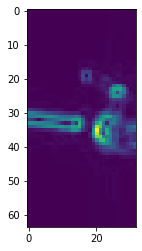

(2048,)
